In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import utils.mp1 as generator

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import optimizers
from keras.utils import to_categorical, normalize
from keras.regularizers import l2

## 3) Simple Classification

__Generate dataset__

In [3]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20)

  1%|          | 9/800 [00:00<00:09, 87.60it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 75.93it/s]


Quick look at random samples from the dataset

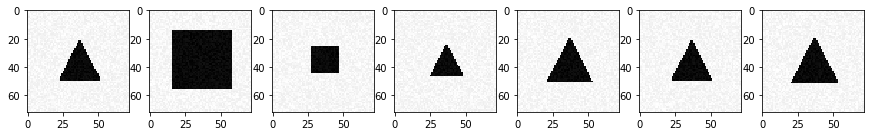

In [4]:
batch_size = 7
fig, ax = plt.subplots(1, batch_size, figsize=(15, batch_size * 5))

random_batch = random.choices(X_train, k=batch_size)
for i, item in enumerate(random_batch):
    ax[i].imshow(item.reshape(generator.IMAGE_SIZE, -1), cmap='gray')

Quick look at labels distribution

In [5]:
print(np.unique(Y_train, return_counts=True))

(array([0., 1., 2.]), array([278, 248, 274]))


Fairly distributed

__Model__

No need to go deep when shallow works fine, for such a simple task we will use a single layer

In [6]:
input_shape = X_train[0].shape
dense_units = 3

In [7]:
# Input layer
x_in = Input(shape=input_shape)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x_in)

model = Model(inputs=[x_in], outputs=[x])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [9]:
simple_model_path = "models/simple_model_untrained.h5"
model.save(simple_model_path)

In [10]:
y_train = to_categorical(Y_train)

__Training with SGD optimizer__

In [11]:
model_sgd = load_model(simple_model_path)

sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.6, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', 
                  metrics = ['accuracy'],
                  optimizer=sgd)

/root/anaconda3/envs/main/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
loss = model_sgd.fit(X_train, 
                     y_train,
                     batch_size = 32,
                     epochs = 12,
                     validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/12
640/640 [==============================] - 0s 621us/step - loss: 1.0616 - acc: 0.4906 - val_loss: 0.8123 - val_acc: 0.6375
Epoch 2/12
640/640 [==============================] - 0s 141us/step - loss: 0.7561 - acc: 0.6875 - val_loss: 0.5999 - val_acc: 0.8250
Epoch 3/12
640/640 [==============================] - 0s 144us/step - loss: 0.6161 - acc: 0.7609 - val_loss: 0.5362 - val_acc: 0.8250
Epoch 4/12
640/640 [==============================] - 0s 136us/step - loss: 0.6119 - acc: 0.7359 - val_loss: 0.4654 - val_acc: 0.8187
Epoch 5/12
640/640 [==============================] - 0s 139us/step - loss: 0.4830 - acc: 0.8094 - val_loss: 0.4554 - val_acc: 0.7750
Epoch 6/12
640/640 [==============================] - 0s 143us/step - loss: 0.4237 - acc: 0.8578 - val_loss: 0.3763 - val_acc: 0.9375
Epoch 7/12
640/640 [==============================] - 0s 139us/step - loss: 0.3935 - acc: 0.8859 - val_loss: 0.4124 - val_acc: 0.7750
Epoch 8/12
640/6

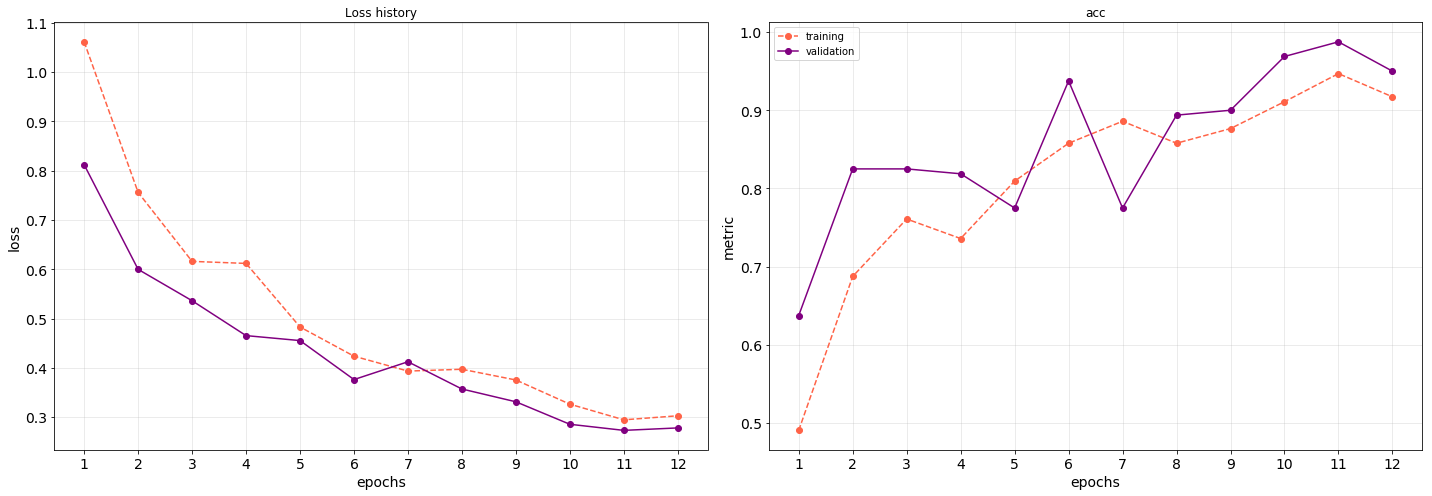

In [13]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

__Training with Adam optimizer__

In [14]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

In [15]:
loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 10,
                      validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 0s 465us/step - loss: 1.2546 - acc: 0.4781 - val_loss: 1.0646 - val_acc: 0.6438
Epoch 2/10
640/640 [==============================] - 0s 152us/step - loss: 0.6783 - acc: 0.7031 - val_loss: 0.4973 - val_acc: 0.6937
Epoch 3/10
640/640 [==============================] - 0s 154us/step - loss: 0.4508 - acc: 0.7656 - val_loss: 0.3083 - val_acc: 0.8562
Epoch 4/10
640/640 [==============================] - 0s 157us/step - loss: 0.3252 - acc: 0.8219 - val_loss: 0.2906 - val_acc: 0.8500
Epoch 5/10
640/640 [==============================] - 0s 157us/step - loss: 0.2102 - acc: 0.9391 - val_loss: 0.1449 - val_acc: 1.0000
Epoch 6/10
640/640 [==============================] - 0s 158us/step - loss: 0.1498 - acc: 0.9828 - val_loss: 0.1180 - val_acc: 1.0000
Epoch 7/10
640/640 [==============================] - 0s 155us/step - loss: 0.1270 - acc: 0.9844 - val_loss: 0.0893 - val_acc: 1.0000
Epoch 8/10
640/6

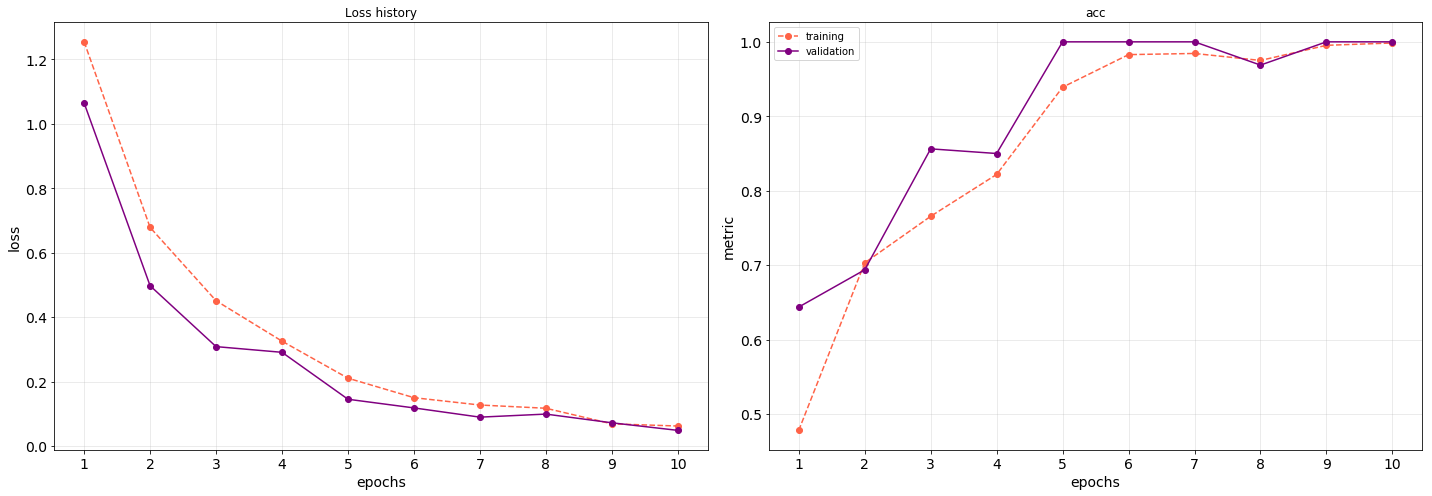

In [16]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

## 4) Visualize the solution

In [17]:
weights_sgd = model_sgd.get_weights()[0]
weights_adam = model_adam.get_weights()[0]

Text(0.5, 1.0, 'Adam - Triangle')

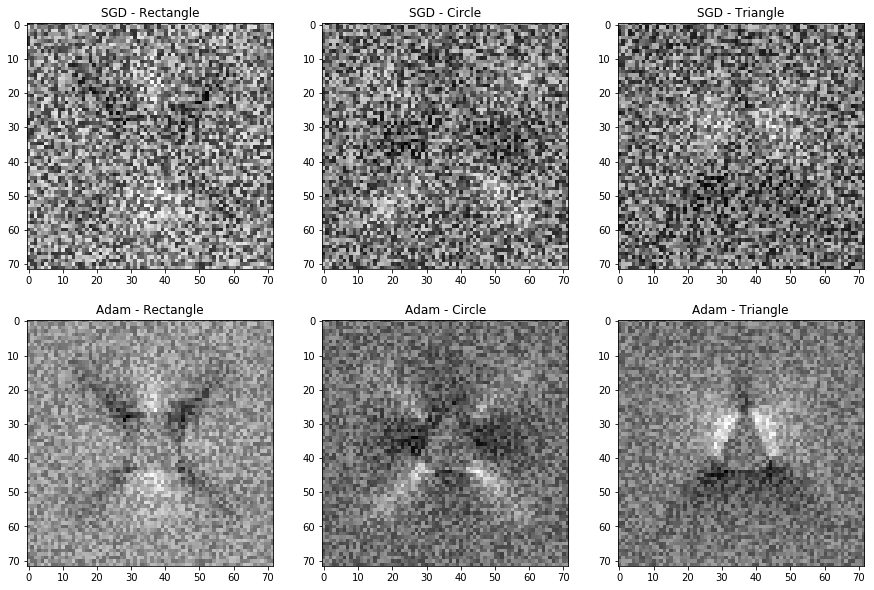

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(weights_sgd[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 0].set_title("SGD - Rectangle")
ax[0, 1].imshow(weights_sgd[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 1].set_title("SGD - Circle")
ax[0, 2].imshow(weights_sgd[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 2].set_title("SGD - Triangle")

ax[1, 0].imshow(weights_adam[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 0].set_title("Adam - Rectangle")
ax[1, 1].imshow(weights_adam[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 1].set_title("Adam - Circle")
ax[1, 2].imshow(weights_adam[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 2].set_title("Adam - Triangle")

- Pixels activation is much clearer when Adam is used, consistent with its superior performances
- Pixel activation is consistent with the shape it is predicting :
    - Rectangle pixel activation focuses on lateral pixels and doesn't activate diagonal ones
    - Inversely, ircle mainly focuses on diagonal pixel as circles tends to spread more than rectangle and triangles toward diagonal
    - Triangles activate edges pixels and don't trigger bissector's axis pixels

## 5) A More Difficult Classification Problem

We know allow shapes to move

In [19]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20, True)
y_train = to_categorical(Y_train)

  0%|          | 3/800 [00:00<00:27, 28.65it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 74.91it/s]


In [20]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 24,
                      validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/24
640/640 [==============================] - 0s 491us/step - loss: 1.6362 - acc: 0.3609 - val_loss: 1.1626 - val_acc: 0.3937
Epoch 2/24
640/640 [==============================] - 0s 153us/step - loss: 1.1455 - acc: 0.4656 - val_loss: 1.0052 - val_acc: 0.4625
Epoch 3/24
640/640 [==============================] - 0s 153us/step - loss: 1.0532 - acc: 0.4656 - val_loss: 0.9864 - val_acc: 0.5062
Epoch 4/24
640/640 [==============================] - 0s 150us/step - loss: 0.9342 - acc: 0.5531 - val_loss: 0.9243 - val_acc: 0.5188
Epoch 5/24
640/640 [==============================] - 0s 154us/step - loss: 0.9236 - acc: 0.5656 - val_loss: 1.0582 - val_acc: 0.4813
Epoch 6/24
640/640 [==============================] - 0s 149us/step - loss: 0.8320 - acc: 0.5938 - val_loss: 1.0588 - val_acc: 0.4938
Epoch 7/24
640/640 [==============================] - 0s 153us/step - loss: 0.8728 - acc: 0.6000 - val_loss: 0.9513 - val_acc: 0.5687
Epoch 8/24
640/6

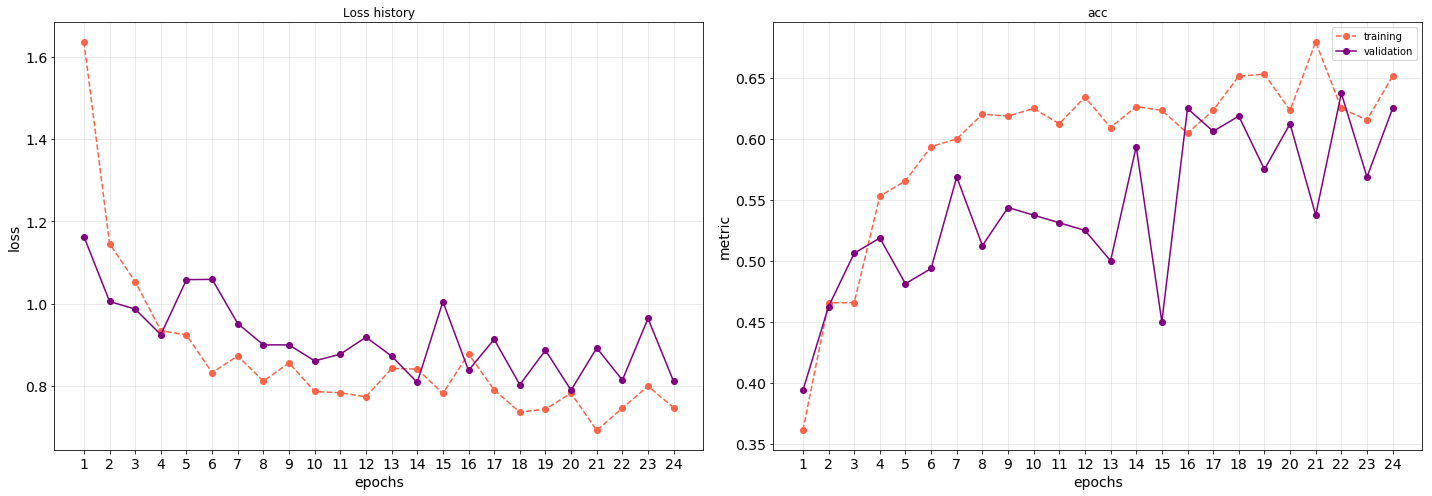

In [21]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

Now that the shapes aren't centered anymore, our elementary network struggles to reach the same accuracy as previously

__Evaluate on testing set__

In [22]:
[X_test, Y_test] = generator.generate_test_set_classification()

  3%|▎         | 9/300 [00:00<00:03, 85.45it/s]

Creating data:


100%|██████████| 300/300 [00:04<00:00, 63.68it/s]


In [23]:
# loss and accuracy
model_adam.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 66us/step


[0.7654731790224711, 0.6266666666666667]

Consistent with the plots above, the obtained loss is greater than the one obtained for the centered shapes and accuracy is lower. Time has come to get deep and move on from this single-layer architecture

### Convnet

For the convolutional network, the number of parameter for training rises (1 184 419 vs 15 555 in the previous model), we hence need to increase the size of the dataset in order to reach a satisfying model and avoid overfitting

In [24]:
[X_train, Y_train] = generator.generate_dataset_classification(2000, 20, True)
y_train = to_categorical(Y_train)

  0%|          | 0/2000 [00:00<?, ?it/s]

Creating data:


100%|██████████| 2000/2000 [00:27<00:00, 73.13it/s]


In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU, concatenate
from keras.callbacks import EarlyStopping

In [26]:
# Input layer
x_in = Input(shape=(generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1))

# Convolutional layer
x = Conv2D(16, kernel_size=5)(x_in)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.5)(x)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x)

conv_model = Model(inputs=[x_in], outputs=[x])

In [27]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 68, 68, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1183808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [28]:
conv_model.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = conv_model.fit(X_train.reshape(2000, 72, 72, 1), 
                      y_train,
                      batch_size = 100,
                      epochs = 40,
                      validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 1s 873us/step - loss: 1.4679 - acc: 0.3706 - val_loss: 1.0537 - val_acc: 0.5500
Epoch 2/40
1600/1600 [==============================] - 0s 219us/step - loss: 1.0339 - acc: 0.4344 - val_loss: 0.9967 - val_acc: 0.5250
Epoch 3/40
1600/1600 [==============================] - 0s 225us/step - loss: 0.9700 - acc: 0.4937 - val_loss: 0.9087 - val_acc: 0.6450
Epoch 4/40
1600/1600 [==============================] - 0s 223us/step - loss: 0.8796 - acc: 0.5575 - val_loss: 0.8503 - val_acc: 0.6550
Epoch 5/40
1600/1600 [==============================] - 0s 222us/step - loss: 0.8068 - acc: 0.6306 - val_loss: 0.7832 - val_acc: 0.6800
Epoch 6/40
1600/1600 [==============================] - 0s 226us/step - loss: 0.7381 - acc: 0.6837 - val_loss: 0.7670 - val_acc: 0.6625
Epoch 7/40
1600/1600 [==============================] - 0s 226us/step - loss: 0.7072 - acc: 0.6894 - val_loss: 0.7119 - val_acc: 0.7050
E

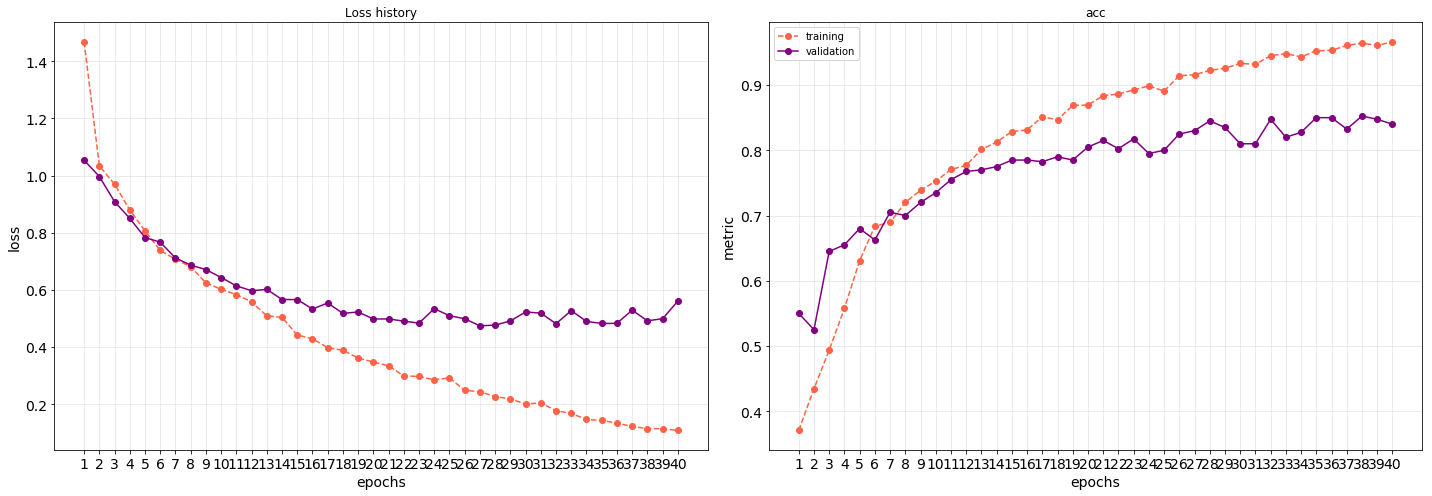

In [29]:
generator.plotLossHistory(loss, metric='acc')
plt.show()

In [30]:
# loss and accuracy
conv_model.evaluate(X_test.reshape(X_test.shape[0], 72, 72, 1), Y_test)

300/300 [==============================] - 0s 198us/step


[0.488876074552536, 0.8533333325386048]

Performances are much better with the convolutional network, and we could pretend to reach even better accuracy by increasing the size of the dataset for example

## 6) A Regression Problem

We now want to tackle another problem : predicting the coordinate of a triangle vertices given its image

__Generate datasets__

In [31]:
[X_train, Y_train] = generator.generate_dataset_regression(10000, 20)
[X_test, Y_test] = generator.generate_test_set_regression()

  0%|          | 9/10000 [00:00<01:53, 88.39it/s]

Creating data:


  3%|▎         | 9/300 [00:00<00:03, 85.92it/s]

Creating data:


100%|██████████| 300/300 [00:03<00:00, 85.02it/s]


__Preprocess data__

Preprocessing steps :
- Normalize dataset : centering data in [-1, 1] 
- Sort vertices : indeed if not sorted, two equals set of vertices might be represented by different arrays. Here we choose to sort them by the first coordinate

In [32]:
def normalize_dataset(X, y):
    max_val = np.max(X)
    min_val = np.min(X)
    X = (X - min_val) / (max_val - min_val)
    y = (y - min_val) / (max_val - min_val)
    X = X - 0.5
    y = y - 0.5
    return [X, y]

def sort_vertices(vertices_array):
    vertices = list(vertices_array.reshape(3, 2))
    vertices.sort(key=lambda x: x[0])
    return np.ravel(vertices)

In [33]:
y_train = np.apply_along_axis(sort_vertices, axis=1, arr=Y_train)
y_test = np.apply_along_axis(sort_vertices, axis=1, arr=Y_test)

[X_train, y_train] = normalize_dataset(X_train, y_train)
[X_test, y_test] = normalize_dataset(X_test, y_test)

__Generate model__

According the sorting vertices instinct, it would seem natural to have 3 separate dense branch after the convolutional block : each branch would hence specialze in detecting a given edge following the x axis

In [34]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [35]:
x_in = Input(shape=input_shape)

# Convolutional blocks
x = Conv2D(16, kernel_size=6, kernel_regularizer=l2(reg_param))(x_in)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, kernel_size=3)(x)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, kernel_size=3)(x)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)


# First branch
x1 = Dense(36, activation="relu")(x)
x1 = Dropout(0.5)(x1)
x1 = Dense(units=2)(x1)

# Second branch
x2 = Dense(36, activation="relu")(x)
x2 = Dropout(0.5)(x2)
x2 = Dense(units=2)(x2)

# Third branch
x3 = Dense(36, activation="relu")(x)
x3 = Dropout(0.5)(x3)
x3 = Dense(units=2)(x3)


# Output layer
x_out = concatenate([x1, x2, x3])

reg_model = Model(inputs=[x_in], outputs=[x_out])

In [36]:
reg_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 67, 67, 16)   592         input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_2 (LeakyReLU)       (None, 67, 67, 16)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 33, 33, 16)   0           leaky_re_lu_2[0][0]              
__________________________________________________________________________________________________
conv2d_3 (

In [37]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.995, epsilon=None, decay=0.01, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-4,
                               patience=2)

In [38]:
reg_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = reg_model.fit(X_train.reshape((n_sample,) + input_shape), 
                      y_train,
                      batch_size = 256,
                      epochs = 100,
                      validation_split=0.2,
                      callbacks=[early_stopping])

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 4s 494us/step - loss: 0.0514 - val_loss: 0.0303
Epoch 2/100
8000/8000 [==============================] - 2s 297us/step - loss: 0.0336 - val_loss: 0.0227
Epoch 3/100
8000/8000 [==============================] - 2s 297us/step - loss: 0.0278 - val_loss: 0.0168
Epoch 4/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.0243 - val_loss: 0.0140
Epoch 5/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.0217 - val_loss: 0.0131
Epoch 6/100
8000/8000 [==============================] - 3s 315us/step - loss: 0.0201 - val_loss: 0.0114
Epoch 7/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.0190 - val_loss: 0.0116
Epoch 8/100
8000/8000 [==============================] - 2s 309us/step - loss: 0.0180 - val_loss: 0.0103
Epoch 9/100
8000/8000 [==============================] - 2s 296us/step - loss: 0.0173 - val_loss: 0.0101
Epoch 1

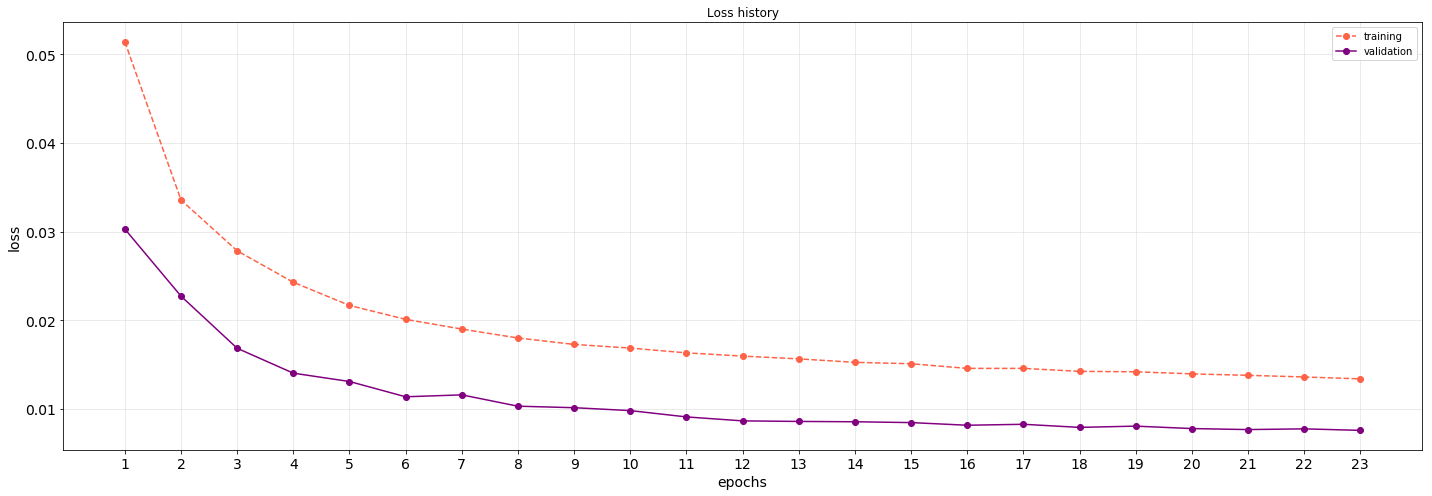

In [39]:
fig, ax1= plt.subplots(figsize=(20, 7))
epochs = range(1, len(loss.history['loss']) + 1)
color1 = 'tomato'
color2 = 'purple'
fontsize = 14
ax1.set_xlabel('epochs', fontsize=fontsize)
ax1.set_ylabel('loss', fontsize=fontsize)
ax1.plot(epochs, loss.history['loss'], '--o', color=color1, label="training")
ax1.plot(epochs, loss.history['val_loss'], '-o', color=color2, label="validation")
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax1.set_xticks(epochs)
ax1.grid(alpha=0.3)
ax1.set_title("Loss history")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

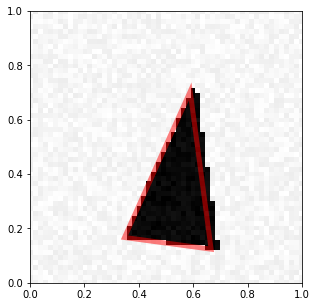

In [40]:
generator.visualize_prediction(X_train[18], Y_train[18])

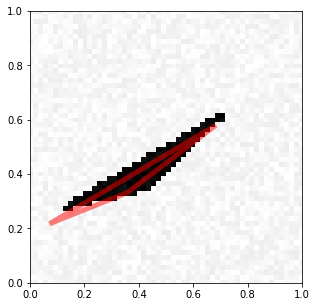

In [41]:
pred = reg_model.predict(X_train[10].reshape((1,) + input_shape)) + 0.5
generator.visualize_prediction(X_train[10], pred)

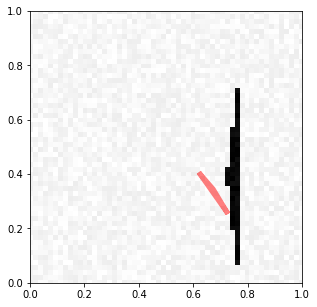

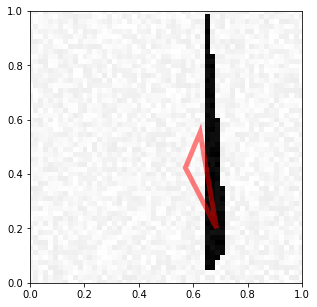

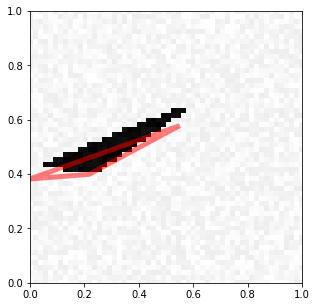

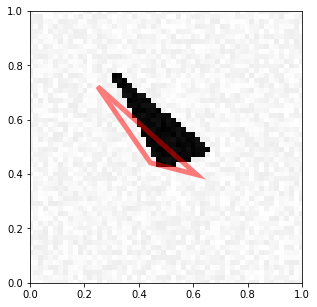

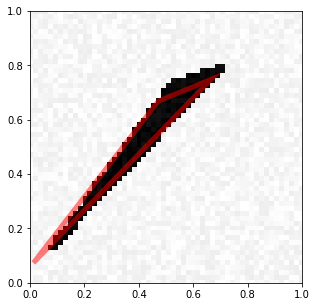

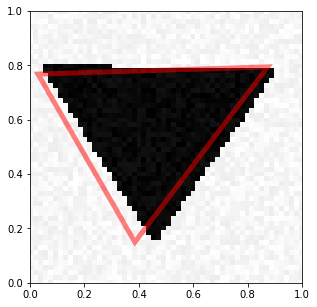

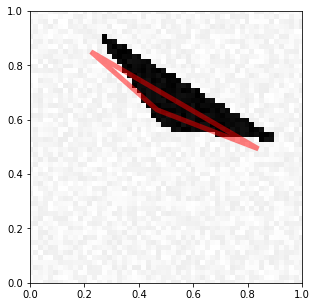

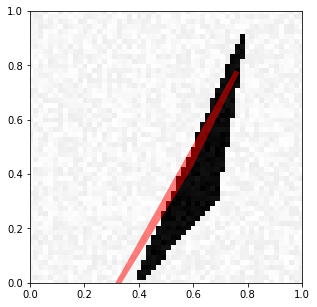

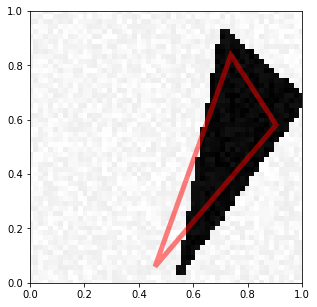

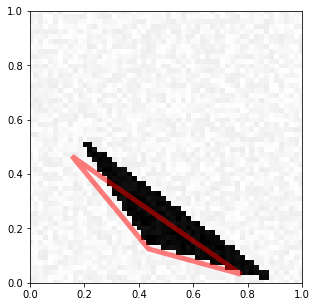

In [42]:
n_sample = 10
test_samples = random.choices(X_test, k=n_sample)
for sample in test_samples:
    pred = reg_model.predict(sample.reshape((1,) + input_shape)) + 0.5
    generator.visualize_prediction(sample, pred)

## 7) Image Denoising

__Generate denoising dataset__

To generate the denoising dataset, we simply use the previously defined generators but generate a noised and clean version of each sample. Our samples would hence be the noisy images and the target the clean ones

In [43]:
from tqdm import tqdm

In [44]:
def generate_denoising_dataset(nb_samples, max_noise, min_noise=20, free_location=True):
    # Getting im size
    im_size = generator.generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in tqdm(range(nb_samples)):
        category = np.random.randint(3)
        noise = (max_noise - min_noise) * np.random.rand() + min_noise
        seed = np.random.randint(10 * nb_samples)
        np.random.seed(seed)
        if category == 0:
            X[i] = generator.generate_a_rectangle(noise=noise, free_location=free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_rectangle(free_location=free_location)
        elif category == 1:
            X[i] = generator.generate_a_disk(noise=noise, free_location=free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_disk(free_location=free_location)
        else:
            [X[i], _] = generator.generate_a_triangle(noise=noise, free_location=free_location)
            np.random.seed(seed)
            [Y[i], _] = generator.generate_a_triangle(free_location=free_location)
    X = (X + noise) / (255 + 2 * noise)
    Y = Y / 255.
    return [X, Y]

In [45]:
MAX_NOISE = 100
[X_train, Y_train] = generate_denoising_dataset(2000, max_noise=MAX_NOISE)
[X_test, Y_test] = generate_denoising_dataset(200, max_noise=MAX_NOISE)

  0%|          | 5/2000 [00:00<00:48, 40.87it/s]

Creating data:


  2%|▏         | 4/200 [00:00<00:05, 36.24it/s]

Creating data:


100%|██████████| 200/200 [00:04<00:00, 42.96it/s]


__Generate Hourglass-like model__

A UNet architecture is here chosen as it helps lowering the blurring effect of a standard autoencoder by weighting in the details of the intitial input. Results are still expected to be blurry but significantly less than with a standard architecture

In [46]:
from keras.layers import concatenate, ReLU, UpSampling2D

In [47]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [53]:
# Input layer
x_in = Input(shape=input_shape)

# Down sample path
x_enc1 = Conv2D(16, kernel_size=5, padding='same')(x_in)
x_enc1 = ReLU()(x_enc1)
x_enc1 = MaxPooling2D(pool_size=(2,2))(x_enc1)

x_enc2 = Conv2D(32, kernel_size=3, padding='same')(x_enc1)
x_enc2 = ReLU()(x_enc2)
x_enc2 = MaxPooling2D(pool_size=(2,2))(x_enc2)

# Up sample path
x_dec = Conv2D(16, kernel_size=3, padding='same')(x_enc2)
x_dec = ReLU()(x_dec)
x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_enc1])

x_dec = Conv2D(16, kernel_size=3, padding='same')(x_dec)
x_dec = ReLU()(x_dec)
x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_in])

x_dec = Conv2D(1, kernel_size=3, padding='same', activation="sigmoid")(x_dec)

hourglass_model = Model(inputs=[x_in], outputs=[x_dec])

In [54]:
hourglass_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 72, 72, 16)   416         input_6[0][0]                    
__________________________________________________________________________________________________
re_lu_5 (ReLU)                  (None, 72, 72, 16)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 36, 36, 16)   0           re_lu_5[0][0]                    
__________________________________________________________________________________________________
conv2d_16 

In [55]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0001, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-3,
                               patience=5)

In [56]:
hourglass_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = hourglass_model.fit(X_train.reshape((n_sample,) + input_shape), 
                           Y_train.reshape((n_sample,) + input_shape),
                           batch_size = 128,
                           epochs = 100,
                           validation_split=0.2,
                           callbacks=[early_stopping])

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1266 - val_loss: 0.0841
Epoch 2/100
1600/1600 [==============================] - 1s 534us/step - loss: 0.0684 - val_loss: 0.0528
Epoch 3/100
1600/1600 [==============================] - 1s 542us/step - loss: 0.0316 - val_loss: 0.0131
Epoch 4/100
1600/1600 [==============================] - 1s 534us/step - loss: 0.0079 - val_loss: 0.0053
Epoch 5/100
1600/1600 [==============================] - 1s 530us/step - loss: 0.0049 - val_loss: 0.0046
Epoch 6/100
1600/1600 [==============================] - 1s 538us/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/100
1600/1600 [==============================] - 1s 538us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/100
1600/1600 [==============================] - 1s 542us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/100
1600/1600 [==============================] - 1s 546us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 10/1

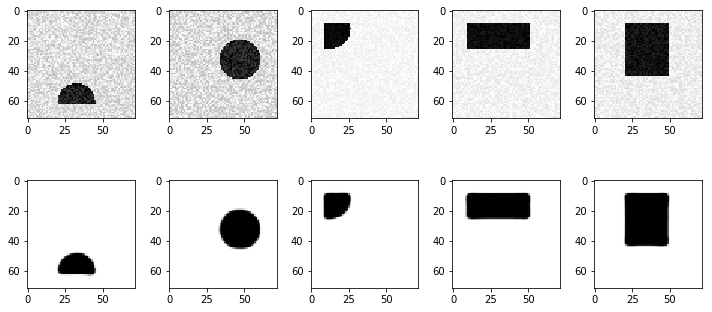

In [57]:
n = 5
test_samples = random.choices(X_test, k=n)

fig, ax = plt.subplots(2, n, figsize=(10, n))
for i, sample in enumerate(test_samples):
    src = sample.reshape(generator.IMAGE_SIZE, -1)
    ax[0][i].imshow(src, cmap='gray')
    denoised = hourglass_model.predict(src[np.newaxis, :, :, np.newaxis])
    ax[1][i].imshow(denoised.reshape(generator.IMAGE_SIZE, -1), cmap='gray')
plt.tight_layout()